In [1]:
#Libraries
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy.polynomial.polynomial as poly
from numpy.polynomial import Polynomial
import scipy.constants as const

#Configuration for the font and style in the graphics
params = {
        'font.family': 'serif',
        'font.serif': ['STIXGeneral', 'Times New Roman'],
        'font.size': 12,
        'axes.labelsize': 12,
        'axes.titlesize': 14,
        'legend.fontsize': 13,
        'xtick.labelsize': 13,
        'ytick.labelsize': 13,
        'mathtext.fontset': 'stix',
        'text.usetex': False,
        'figure.figsize': (6.4, 4.8),
        'savefig.format': 'pdf',
        'savefig.bbox': 'tight'
    }
    
plt.rcParams.update(params)

In [2]:
#Lines from the excel files
VIS_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Visible range\Data\valores_VIS.xlsx")
NIR_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Infrared range\Data\valores_NIR.xlsx")
SPA_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Spatially Resolved Atlas\values_SPA.xlsx")
ALL_data = pd.concat([VIS_data,NIR_data],axis=0).reset_index(drop=True)

#colors for the plot
colors_fit = ['purple','blue','cyan','green','yellow','orange','red','brown','darkred']

## Gray and Oostra standard curve

### Give a second order polynomial fit for each color

In [3]:
#Separate for range in colors
values_VIS = [ VIS_data[VIS_data['Observed wavelength'].between(3800, 4270, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(4270, 4760, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(4760, 4970, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(4970, 5700, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(5700, 5810, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(5810, 6180, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(6180, 7800, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(7800, 11000, inclusive='neither')]
]

values_SPA = [SPA_data[SPA_data['Observed wavelength'].between(3800, 4270, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(4270, 4760, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(4760, 4970, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(4970, 5700, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(5700, 5810, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(5810, 6180, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(6180, 7800, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(7800, 11000, inclusive='neither')]
]


values_ALL = [ ALL_data[ALL_data['Observed wavelength'].between(3800, 4270, inclusive='neither')],
                ALL_data[ALL_data['Observed wavelength'].between(4270, 4760, inclusive='neither')],
                ALL_data[ALL_data['Observed wavelength'].between(4760, 4970, inclusive='neither')],
                ALL_data[ALL_data['Observed wavelength'].between(4970, 5700, inclusive='neither')],
                ALL_data[ALL_data['Observed wavelength'].between(5700, 5810, inclusive='neither')],
                ALL_data[ALL_data['Observed wavelength'].between(5810, 6180, inclusive='neither')],
                ALL_data[ALL_data['Observed wavelength'].between(6180, 7800, inclusive='neither')],
                ALL_data[ALL_data['Observed wavelength'].between(7800, 11000, inclusive='neither')],
                ALL_data[ALL_data['Observed wavelength'].between(11000, 25000, inclusive='neither')]]

values_VIS_standard = VIS_data[VIS_data['Observed wavelength'].between(6020,6340, inclusive='right')]

The range used on Gray and Oostra article for the standard curve was 6020–6340 Å, we can stablish just a green range (4970-5700 Å) for comparised and report all the color curves started on violet range.

For consistency, the standard curve is comparised only using the visible range for the solar flux atlas.

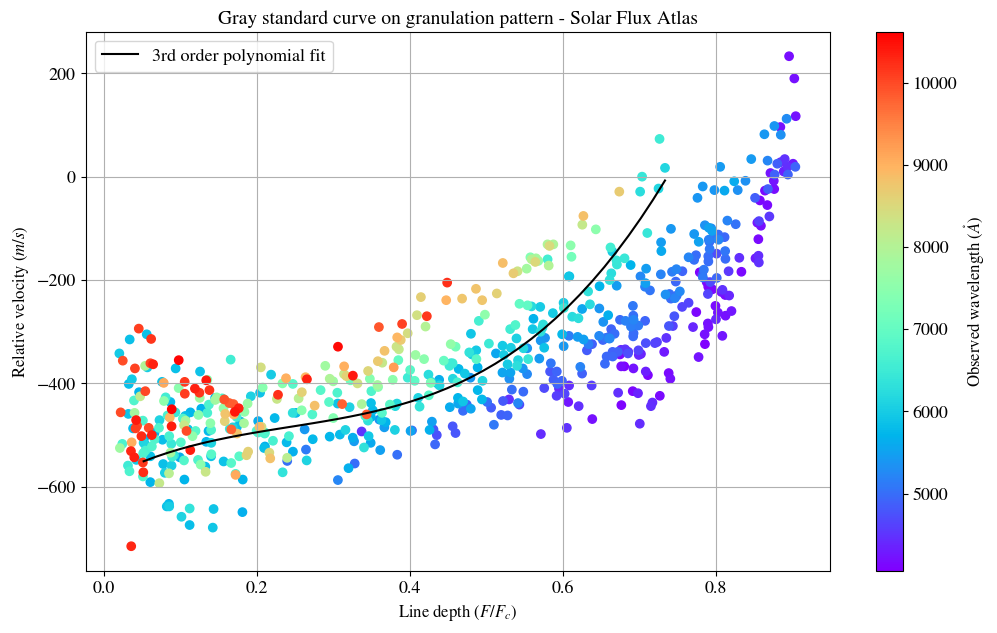

In [4]:
fig3, ax = plt.subplots(1,1,figsize=(12,7))

pol = Polynomial.fit(1-values_VIS_standard['Flux'],values_VIS_standard['Velocity'], 3)
param = pol.convert().coef
values_flux = np.linspace(min(1-values_VIS_standard['Flux']), max(1-values_VIS_standard['Flux']), len(1-values_VIS_standard['Flux']))
flux_fit = poly.polyval(values_flux,param)

scatter = ax.scatter(1-VIS_data['Flux'],VIS_data['Velocity'],c=VIS_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.plot(values_flux,flux_fit,color='k',label='3rd order polynomial fit')

ax.set_title('Gray standard curve on granulation pattern - Solar Flux Atlas',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Relative velocity $(m/s)$',fontsize=12)
ax.legend()
ax.grid()

# fig3.savefig('Standard curve_Gray.pdf')

<Axes: xlabel='Velocity', ylabel='Flux'>

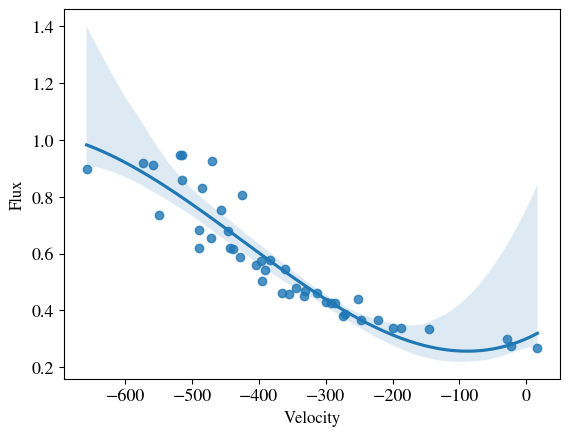

In [5]:
import seaborn as sns
#[values_VIS_standard['Velocity']>-600]
value = values_VIS_standard

sns.regplot(data= value['Flux'], x=value['Velocity'], y=value['Flux'],order=3)


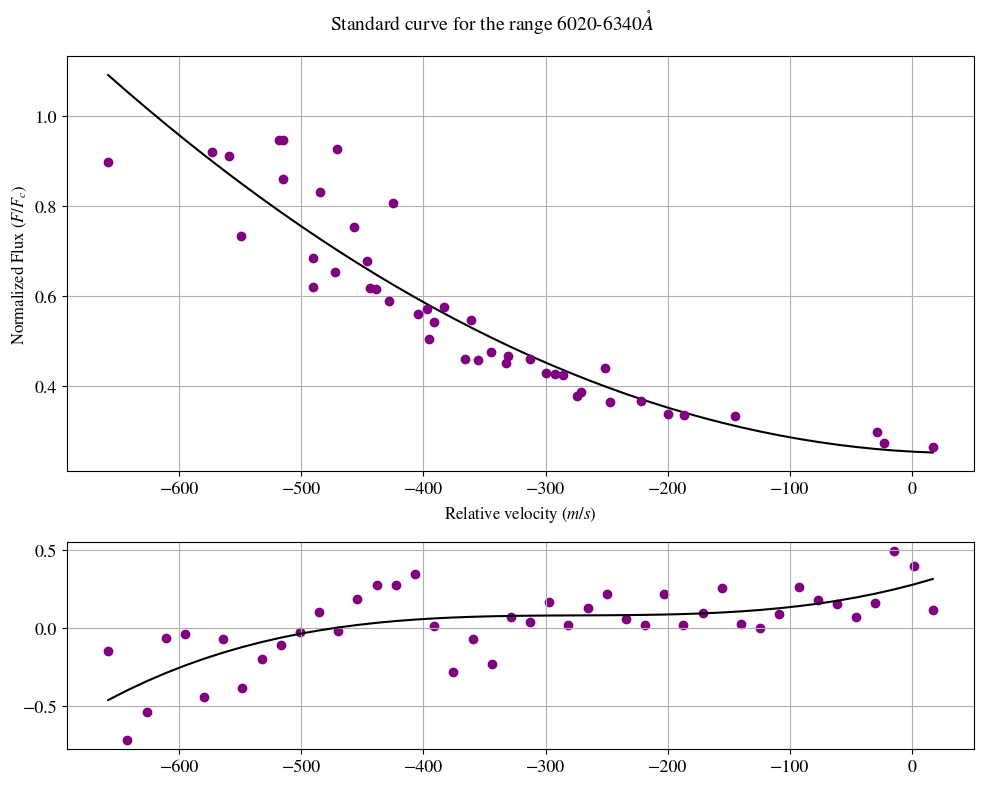

In [6]:
# Calcular errores basados en los residuos del ajuste
# values_VIS_standard = values_VIS_standard[values_VIS_standard['Velocity']>-600]
pol = Polynomial.fit(values_VIS_standard['Velocity'],values_VIS_standard['Flux'], 2)
param = pol.convert().coef
values_vel = np.linspace(min(values_VIS_standard['Velocity']), max(values_VIS_standard['Velocity']), 44)
vel_fit = poly.polyval(values_vel,param)

residuos = (values_VIS_standard['Flux']) - vel_fit
std_flux = np.std(residuos) 

#Gráfico con residuos
fig, axis = plt.subplots(2,1, figsize = (10, 8), gridspec_kw = {"height_ratios":[2, 1]})
ax1 = axis[0]
ax2 = axis[1]

fig.suptitle(r'Standard curve for the range 6020-6340$\mathring{A}$',fontsize=14)

ax1.errorbar(values_VIS_standard['Velocity'],values_VIS_standard['Flux'], capsize=6,fmt='o', color='purple')
ax1.plot(values_vel,vel_fit,c='k')
ax1.set_ylabel(r'Normalized Flux $(F/F_{c})$',fontsize=12)
ax1.set_xlabel(r'Relative velocity $(m/s)$',fontsize=12)
# ax1.text(-380, 0.2, r'$F/F_c$ = {}$v^3$ + {}$v^2$ + {}$v$ + {}'.format(round(param[0],4),round(param[1],4),round(param[2],5),round(param[3],8)),color='k',fontsize=14)
ax1.grid()
ax1.tick_params(axis='both',labelsize=13)

#Check if there a polynomial correction on the residues
pol_res = Polynomial.fit(values_vel,residuos, 3)
param_res = pol_res.convert().coef
values_res = np.linspace(min(values_vel), max(values_vel), len(values_vel))
res_fit = poly.polyval(values_res,param_res)

ax2.scatter(values_vel,residuos,c='purple')
ax2.plot(values_res,res_fit,c='k')
ax2.grid()
ax2.tick_params(axis='both',labelsize=13)


fig.tight_layout()
#plt.savefig('Calibracion.pdf')

In [7]:
data_curve = pd.DataFrame([])
data_curve['Vel fit'] = vel_fit
data_curve['Vel values'] = values_vel

# data_curve.to_excel('standard_curve.xlsx',index=False)

param

array([ 2.55154806e-01, -1.47151609e-04,  1.70638672e-06])

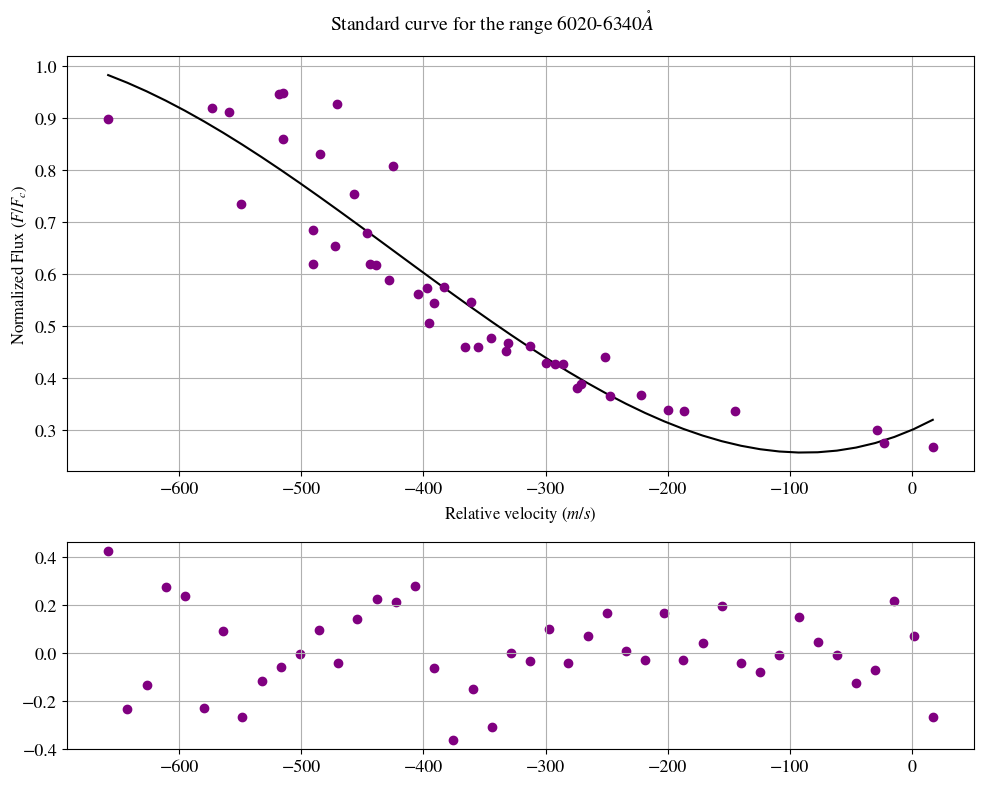

In [8]:
#Ajuste de errores basados en los residuos del ajuste
pol = Polynomial.fit(values_VIS_standard['Velocity'],values_VIS_standard['Flux'], 3)
param = pol.convert().coef
values_vel = np.linspace(min(values_VIS_standard['Velocity']), max(values_VIS_standard['Velocity']), len(values_VIS_standard['Velocity']))
vel_fit = poly.polyval(values_vel,(param+param_res))

residuos = (values_VIS_standard['Flux']) - vel_fit
std_flux = np.std(residuos) 

#Gráfico con residuos
fig, axis = plt.subplots(2,1, figsize = (10, 8), gridspec_kw = {"height_ratios":[2, 1]})
ax1 = axis[0]
ax2 = axis[1]

fig.suptitle(r'Standard curve for the range 6020-6340$\mathring{A}$',fontsize=14)

ax1.errorbar(values_VIS_standard['Velocity'],values_VIS_standard['Flux'], capsize=6,fmt='o', color='purple')
ax1.plot(values_vel,poly.polyval(values_vel,(param)),c='k')
ax1.set_ylabel(r'Normalized Flux $(F/F_{c})$',fontsize=12)
ax1.set_xlabel(r'Relative velocity $(m/s)$',fontsize=12)
# ax1.text(-380, 0.2, r'$F/F_c$ = {}$v^3$ + {}$v^2$ + {}$v$ + {}'.format(round(param[0],4),round(param[1],4),round(param[2],5),round(param[3],8)),color='k',fontsize=14)
ax1.grid()
ax1.tick_params(axis='both',labelsize=13)

ax2.scatter(values_vel,residuos,c='purple')
ax2.grid()
ax2.tick_params(axis='both',labelsize=13)


fig.tight_layout()
#plt.savefig('Calibracion.pdf')

In [9]:
param+param_res

array([5.77756450e-01, 3.12475907e-03, 1.40913031e-05, 1.44004108e-08])

Now, we define the new standard curve (all green range) with their respectives shifts and yes, we include the near infrared.

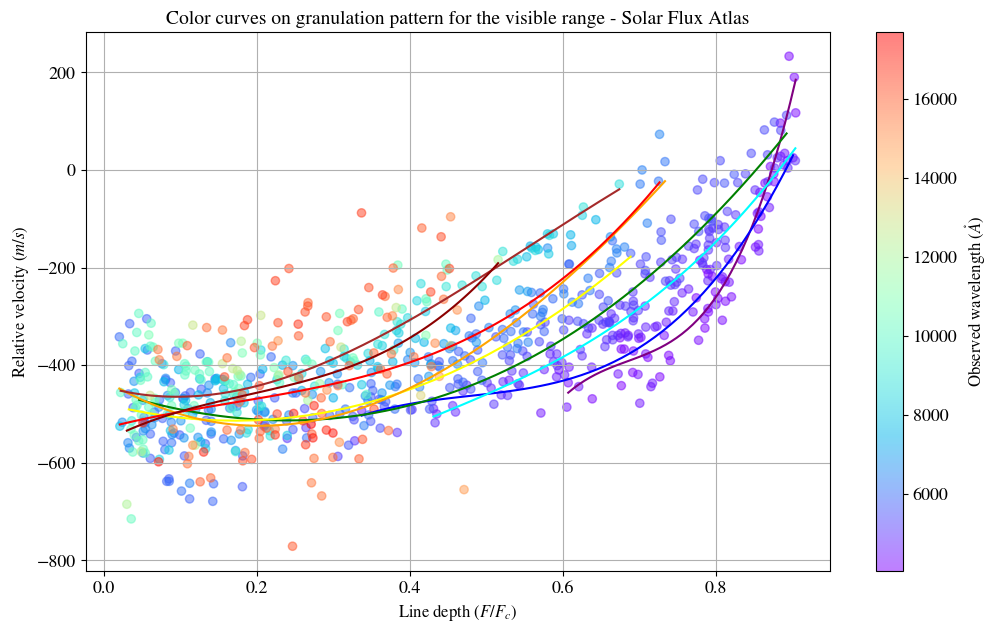

In [10]:
#List for the data
param_ALL = []
fit_ALL = []

fig5, ax = plt.subplots(1,1,figsize=(12,7))

#Plot the cuadratic fit for each color
for i in range(0,len(values_ALL)):  
    
    pol = Polynomial.fit(1-values_ALL[i]['Flux'], values_ALL[i]['Velocity'], 3)
    param = pol.convert().coef
    values_flux = np.linspace(min(1-values_ALL[i]['Flux']), max(1-values_ALL[i]['Flux']), len(1-values_ALL[i]['Flux']))
    flux_fit = poly.polyval(values_flux,param)

    ax.plot(values_flux,flux_fit, color=colors_fit[i])

    param_ALL.append(pd.DataFrame(param))
    fit_ALL.append([values_flux,flux_fit])

scatter = ax.scatter(1-ALL_data['Flux'],ALL_data['Velocity'],c=ALL_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o', alpha=0.5)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Color curves on granulation pattern for the visible range - Solar Flux Atlas',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Relative velocity $(m/s)$',fontsize=12)
ax.grid()

# fig5.savefig('ColorCurves_VIS.pdf')

In [11]:
#Calculate te average and show the parameters
parameters_ALL = pd.concat(param_ALL,axis=1)
parameters_ALL = parameters_ALL.set_axis(colors_fit, axis=1)
parameters_ALL = parameters_ALL.T.set_axis(['ax^3','bx^2','cx','d'],axis=1)

parameters_ALL

,ax^3,bx^2,cx,d
purple,-14451.987575,60445.921804,-87428.172843,42555.754046
blue,-1158.293234,4009.097642,-8010.571736,5577.135276
cyan,-914.382125,1634.746473,-2463.509696,2022.580288
green,-449.284920,-511.856559,945.410796,320.346419
yellow,-478.485057,-407.341663,1159.044573,96.328050
orange,-429.279850,-958.403791,2553.498667,-670.993195
red,-529.848562,414.011208,-892.361532,1759.257043
brown,-443.590414,-456.747892,2611.755104,-1549.976429
darkred,-557.023390,825.543288,-2500.437988,4415.089049


In [12]:
scale_coeff = pd.DataFrame()
scale_coeff['3rd order'] = parameters_ALL['ax^3']/parameters_ALL['ax^3'].iloc[3]
scale_coeff['2nd order'] = parameters_ALL['bx^2']/parameters_ALL['bx^2'].iloc[3]
scale_coeff['1st order'] = parameters_ALL['cx']/parameters_ALL['cx'].iloc[3]
scale_coeff['Shift'] = parameters_ALL['d']/parameters_ALL['d'].iloc[3]
scale_coeff

,3rd order,2nd order,1st order,Shift
purple,32.166643,-118.091525,-92.476385,132.842921
blue,2.578082,-7.832463,-8.473112,17.409701
cyan,2.035194,-3.193759,-2.605756,6.313728
green,1.000000,1.000000,1.000000,1.000000
yellow,1.064992,0.795812,1.225969,0.300700
orange,0.955474,1.872407,2.700941,-2.094586
red,1.179315,-0.808842,-0.943888,5.491733
brown,0.987325,0.892336,2.762561,-4.838438
darkred,1.239800,-1.612841,-2.644816,13.782233
